<a href="https://colab.research.google.com/github/purvamarkam/ML_LAB/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

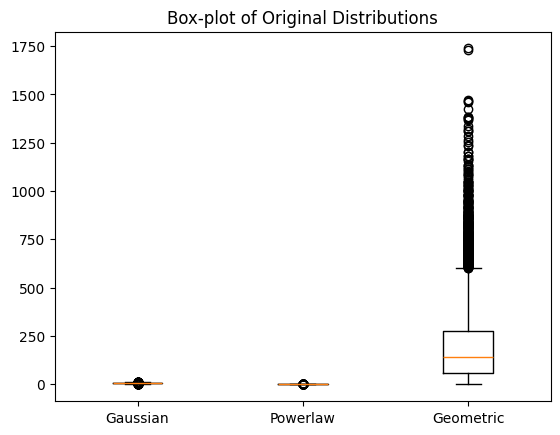

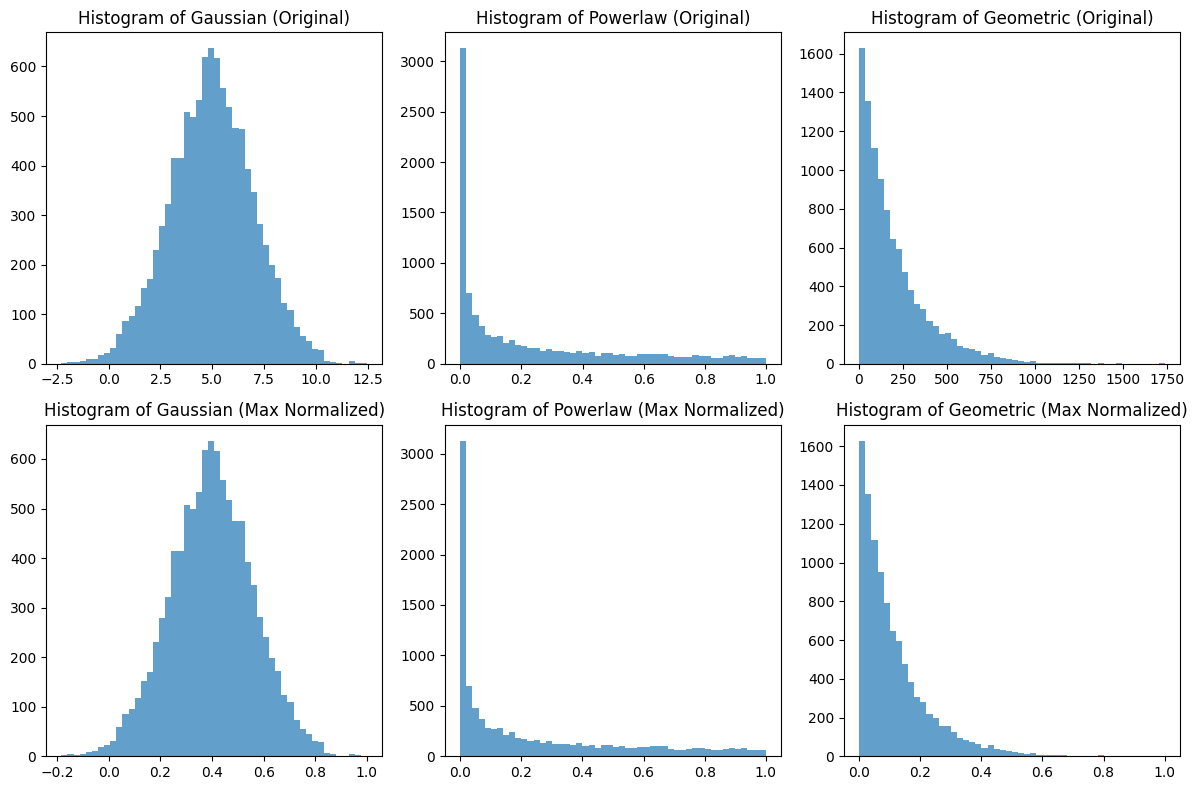

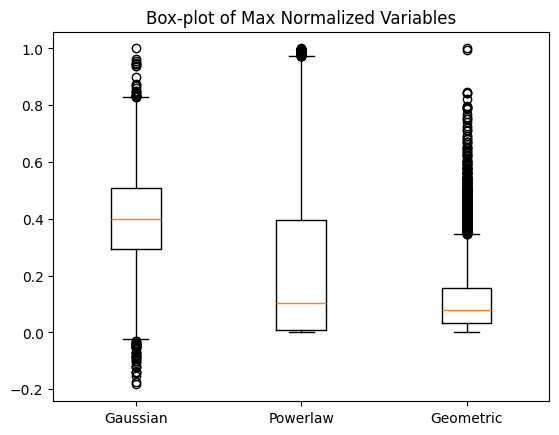

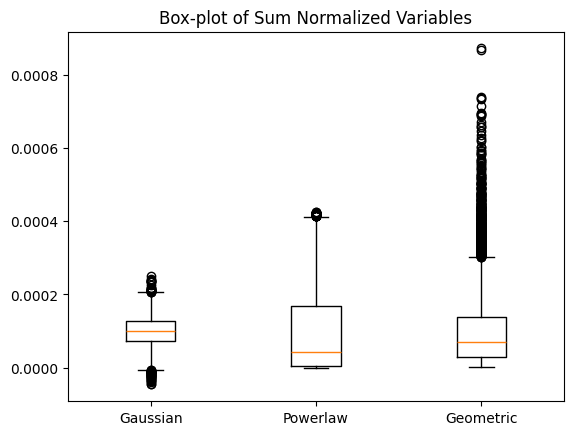

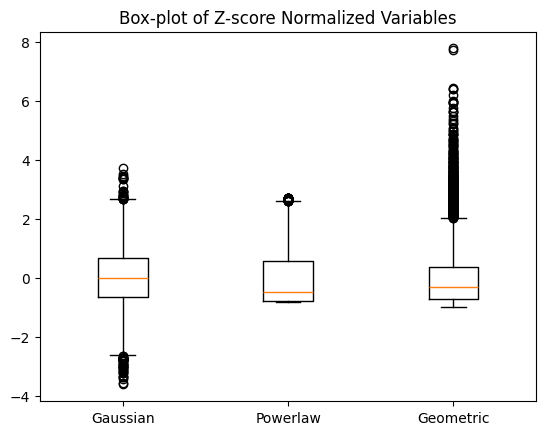

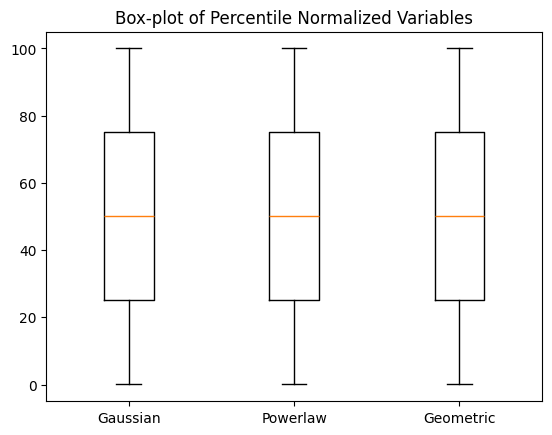

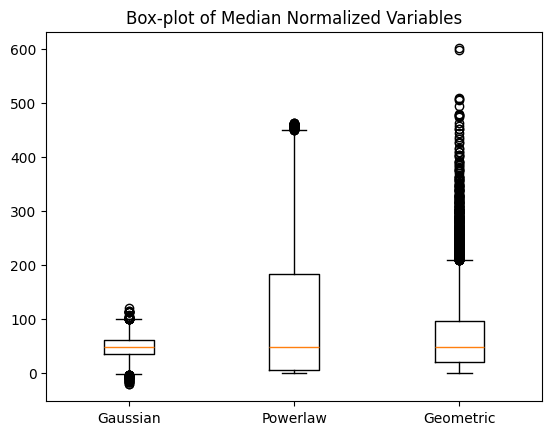

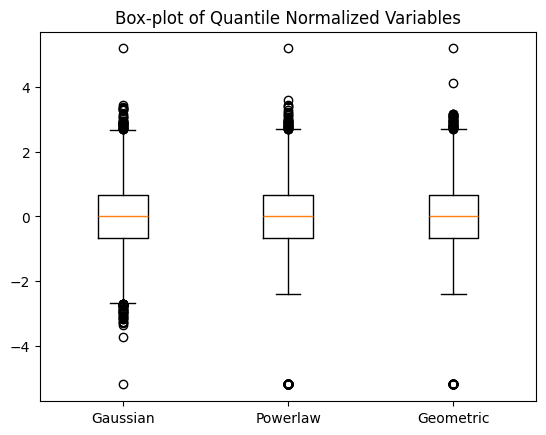

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import powerlaw
from sklearn.preprocessing import quantile_transform

# Set random seed for reproducibility
np.random.seed(69)

# Step 1: Generate the variables
totalsize = 10000

# Gaussian distribution (B)
gaussian_mean = 5
gaussian_sd = 2
B = np.random.normal(gaussian_mean, gaussian_sd, size=totalsize)

# Power Law distribution (I)
a = 0.3
I = powerlaw.rvs(a, size=totalsize)

# Geometric distribution (H)
p = 0.005
H = np.random.geometric(p, size=totalsize)

# Step 2: Compare the original distributions with a boxplot
plt.boxplot([B, I, H], tick_labels=["Gaussian", "Powerlaw", "Geometric"])
plt.title("Box-plot of Original Distributions")
plt.show()

# Step 3: Apply the normalization methods

# 3.1 Max normalization
def max_normalization(B, I, H):
    return B / np.max(B), I / np.max(I), H / np.max(H)

B_max, I_max, H_max = max_normalization(B, I, H)

# 3.2 Sum normalization
def sum_normalization(B, I, H):
    return B / np.sum(B), I / np.sum(I), H / np.sum(H)

B_sum, I_sum, H_sum = sum_normalization(B, I, H)

# 3.3 Z-score normalization
def zscore_normalization(B, I, H):
    return (B - B.mean()) / B.std(), (I - I.mean()) / I.std(), (H - H.mean()) / H.std()

B_zscore, I_zscore, H_zscore = zscore_normalization(B, I, H)

# 3.4 Percentile normalization
def percentile(array):
    np.sort(array)
    curr_value = np.arange(1, len(array) + 1)
    return (curr_value / len(array)) * 100

def percentile_normalization(B, I, H):
    return percentile(B), percentile(I), percentile(H)

B_percentile, I_percentile, H_percentile = percentile_normalization(B, I, H)

# 3.5 Median normalization
def same_median(B, I, H):
    gaussian_median = np.median(B)
    powerlaw_median = np.median(I)
    geometric_median = np.median(H)

    mean_of_median = (gaussian_median + powerlaw_median + geometric_median) / 3

    multiplier1 = mean_of_median / gaussian_median
    multiplier2 = mean_of_median / powerlaw_median
    multiplier3 = mean_of_median / geometric_median

    return multiplier1 * B, multiplier2 * I, multiplier3 * H

B_median, I_median, H_median = same_median(B, I, H)

# 3.6 Quantile normalization
df = pd.DataFrame({
    "Gaussian": B,
    "Powerlaw": I,
    "Geometric": H
})
df_quantile_normalized = pd.DataFrame(
    quantile_transform(df, output_distribution='normal', copy=True),
    columns=df.columns
)
B_quantile = df_quantile_normalized["Gaussian"]
I_quantile = df_quantile_normalized["Powerlaw"]
H_quantile = df_quantile_normalized["Geometric"]

# Step 4: Visualizations

# Compare original distributions with histograms
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.hist(B, bins=50, alpha=0.7, label="Gaussian")
plt.title("Histogram of Gaussian (Original)")

plt.subplot(2, 3, 2)
plt.hist(I, bins=50, alpha=0.7, label="Powerlaw")
plt.title("Histogram of Powerlaw (Original)")

plt.subplot(2, 3, 3)
plt.hist(H, bins=50, alpha=0.7, label="Geometric")
plt.title("Histogram of Geometric (Original)")

# Histograms after normalization
plt.subplot(2, 3, 4)
plt.hist(B_max, bins=50, alpha=0.7, label="Gaussian (Max Normalized)")
plt.title("Histogram of Gaussian (Max Normalized)")

plt.subplot(2, 3, 5)
plt.hist(I_max, bins=50, alpha=0.7, label="Powerlaw (Max Normalized)")
plt.title("Histogram of Powerlaw (Max Normalized)")

plt.subplot(2, 3, 6)
plt.hist(H_max, bins=50, alpha=0.7, label="Geometric (Max Normalized)")
plt.title("Histogram of Geometric (Max Normalized)")

plt.tight_layout()
plt.show()

# Boxplots comparing all the normalized variables
plt.boxplot([B_max, I_max, H_max], tick_labels=["Gaussian", "Powerlaw", "Geometric"])
plt.title("Box-plot of Max Normalized Variables")
plt.show()

plt.boxplot([B_sum, I_sum, H_sum], tick_labels=["Gaussian", "Powerlaw", "Geometric"])
plt.title("Box-plot of Sum Normalized Variables")
plt.show()

plt.boxplot([B_zscore, I_zscore, H_zscore], tick_labels=["Gaussian", "Powerlaw", "Geometric"])
plt.title("Box-plot of Z-score Normalized Variables")
plt.show()

plt.boxplot([B_percentile, I_percentile, H_percentile], tick_labels=["Gaussian", "Powerlaw", "Geometric"])
plt.title("Box-plot of Percentile Normalized Variables")
plt.show()

plt.boxplot([B_median, I_median, H_median], tick_labels=["Gaussian", "Powerlaw", "Geometric"])
plt.title("Box-plot of Median Normalized Variables")
plt.show()

plt.boxplot([B_quantile, I_quantile, H_quantile], tick_labels=["Gaussian", "Powerlaw", "Geometric"])
plt.title("Box-plot of Quantile Normalized Variables")
plt.show()
